# Group exercise 2: Binary Compact Objects

Let us consider a binary system of two compact objects, such as neutron stars or black holes. We assume them to be point-like and their orbit to be circular. The objects have the masses $m_1$ and $m_2$.

A certain combination of the objects' masses is the so-called chirp mass.

$$ M_{chirp} = \frac{(m_1 m_2)^{3/5}}{(m_1 + m_2)^{1/5}} $$

The chirp mass is related to the frequency of gravitational waves $f_{GW}$ that are emitted by the binary system. Over time, the emission of gravitational waves leads to a loss of energy, which results in the objects inspiraling and finally merging. At the same time, the frequency of the gravitational waves increases.

The time derivative of the frequency can be written as

$$ \frac{d f_{GW}}{dt} = \frac{96}{5} \pi^{8/3} \left( \frac{G M_{chirp}}{c^3} \right)^{5/3} f_{GW}^{11/3}, $$

where $G$ is the gravitational constant and $c$ the speed of light.

## Exercise Goals

Use the data given below from a gravitational wave signal, which includes arrays for the time $t$ and amplitude $h_{plus}$ of the GWs. Compute the gravitational wave frequency at more than one thousand points and compute the derivative of the frequency with respect to time numerically. Lastly, determine the chirp mass using the frequency and its derivative.

Detailed instructions follow the code block below.

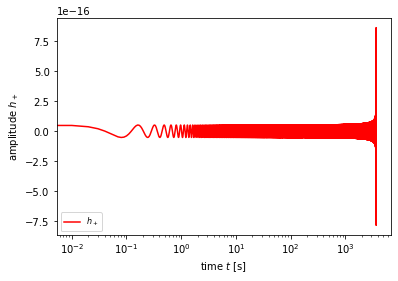

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# This code gives us the data of the GW signal!
# define necessary constants
G = 1.3274648756e11  # km^3/s^2 /M_sun
c = 2.99792458e5     # km/s

# initialize parameters
m_1 = 1.4            # mass of first merging object (in M_sun)
m_2 = 1.4            # mass of second merging object (in M_sun)
d   = 3.086e16       # distance to merger, corresponds to 1 kpc (in km)
R_0 = 1e3            # initial orbital radius (in km)
f_min = 100          # minimum observable frequency of LIGO (in Hz)

# chirp mass of the system
m_chirp = ((m_1*m_2)**(3.0/5.0))/((m_1 + m_2)**(1.0/5.0))

# time until coalescense (idealized of course)
t_coal = (5.0/256.0)*(c**5.0)*((R_0**4.0)/((G**3.0)*m_1*m_2*(m_1 + m_2)))

# create array with time steps
t = np.arange(0.0, t_coal, step = 1.0/f_min)

# calculate phase of GW
phase = - 2.0*(((5.0*G*m_chirp)/(c**3.0))**(-5.0/8.0))*((t_coal - t)**(5.0/8.0))
phase -= phase[0]

# calculate amplitude of GW
h_plus = (4.0/d)*(((G*m_chirp)/(c**2.0))**(5.0/4.0))*((5.0/(t_coal - t))**(1.0/4.0))*np.cos(phase)

# plot the GW signal
plt.plot(t, h_plus, color = 'red', label = r'$h_+$')
plt.xlabel(r'time $t$ [s]')
plt.ylabel(r'amplitude $h_+$')
plt.xscale('log')
plt.legend(loc = 'lower left', fontsize = 8)
plt.show()

## Step 1

First, we have to find maxima of the array 'h_plus' and store them in a new array 'max_h' (the frequency can then be derived as the difference between two maxima). Keep in mind that it might be useful to also extract the time at the maximum from the array 't' and store it in another array 'time_at_max'.

In [2]:
# Code to determine the locations of the maxima in h_plus
max_h = ...
time_at_max = ...

## Step 2

Create an array for the frequencies 'freq'. Compute this by noting that a period is given by the difference between two maxima (two consecutive data points in the array created before). At the same time, create a new array 'time' for the time and append the mean value of the two points in time that belong to the maxima.

In [3]:
# Code to compute the frequency of the signal
freq = ...

## Step 3

Calculate the numerical derivative of the frequency using `np.gradient(freq,time)` and store the result in a new array 'deriv_freq'.

In [4]:
# Code to compute the frequency derivative
deriv_freq = ...

## Step 4

Define a function that calculates the chirp mass from the input parameters 'frequency' and 'frequency derivative'.

In [5]:
def chirp_mass(freq, deriv_freq) :
    # Compute the chirp mass given a frequency and its derivative
    return ...

## Step 5

Loop over all pairs of (frequency, frequency derivative) to calculate the respective values for the chirp mass. Store the results in an array. Calculate the final result for the chirp mass as the mean value of the before created array.

*Note: Similar to what was encountered in the first python exercise, if you supply numpy arrays to the `chirp_mass` function, you may not need to use a loop.*

In [6]:
# Code to compute chirp mass values
